# HSE 2024: Mathematical Methods for Data Analysis

## Homework 2

# Attention!

* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

If the task asks for an explanation of something, it means that a written answer is required, which is part of the task and is assessed

We only accept ipynb notebooks. If you use Google Colab, you need to download the notebook before submitting your homework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder, TargetEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

В модели `OLS` самой весомой категорией оказалась `popularity`, в `Linear Regression` и `Ridge` - `loudness`. Также в этих моделях нет нулевых коэффициентов. В целом, данные результаты не противоречат нашему житейскому опыту: трек может быть популярным, потому что энергичный, и энергичным за счет своей громкости. \\
В модели `Lasso` только `loudness` и `acousticness` имеют ненулевые коэффициенты.

### Data

For this homework we will use a dataset of tracks from the streaming service Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Target variable**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [2]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

## Linear Regression

#### 0. [0.25 points] Code the categorical features. Explain the method you have chosen.

In [3]:
categorical_columns = X.select_dtypes(include = 'object').columns

In [4]:
X[categorical_columns] = TargetEncoder().fit_transform(X[categorical_columns], y)

Используем TargetEncoder, чтобы не раздувать данные лишними столбцами, например, как это делает OneHotEncoder

#### 1. [0.25 points] Split the data into train and test with a ratio of 80:20 and random_state=42.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2. [0.75 points] Train models on train, excluding categorical features, using the StatsModels library and apply it to test; use $RMSE$ and $R^2$ as quality metrics. Try also applying linear regression implementations from sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$

Don't forget to scale your data using StandardScaler before training your models!

In [6]:
scaler = StandardScaler()

X_train[X_train.drop(categorical_columns, axis=1).columns] = scaler.fit_transform(X_train[X_train.drop(categorical_columns, axis=1).columns])
X_test[X_test.drop(categorical_columns, axis=1).columns] = scaler.transform(X_test[X_test.drop(categorical_columns, axis=1).columns])

X_train_temp = X_train.drop(categorical_columns, axis=1)
X_test_temp = X_test.drop(categorical_columns, axis=1)

X_train_sm = sm.add_constant(X_train_temp)
X_test_sm = sm.add_constant(X_test_temp)

In [7]:
def train_and_process_model(label, model_producer, X_train, y_train, X_test, y_test):
    model = model_producer(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(label)
    print("RMSE =", rmse)
    print("R2 =", r2)
    return model

In [8]:
statsmodel_numeric = train_and_process_model("StatsModels", lambda X_train, y_train: sm.OLS(y_train, X_train).fit(), X_train_sm, y_train, X_test_sm, y_test)

StatsModels
RMSE = 0.12171081319566679
R2 = 0.7646278583033055


In [9]:
linreg_numeric = train_and_process_model("LinearRegression", lambda X_train, y_train: LinearRegression().fit(X_train, y_train), X_train_temp, y_train, X_test_temp, y_test)

LinearRegression
RMSE = 0.1217108131956668
R2 = 0.7646278583033055


In [10]:
ridge_numeric = train_and_process_model("Ridge", lambda X_train, y_train: Ridge(alpha=0.03).fit(X_train, y_train), X_train_temp, y_train, X_test_temp, y_test)

Ridge
RMSE = 0.12171081422867525
R2 = 0.76462785430791


In [11]:
lasso_numeric = train_and_process_model("Lasso", lambda X_train, y_train: Lasso(alpha=0.05).fit(X_train, y_train), X_train_temp, y_train, X_test_temp, y_test)

Lasso
RMSE = 0.14798373613042706
R2 = 0.6520436982694859


#### 3. [0.25 points] Repeat the steps from the previous point, adding categorical features. Comment on the changes in the quality metrics values

In [12]:
X_train_sm = sm.add_constant(X_train.dropna())
X_test_sm = sm.add_constant(X_test.dropna())

In [13]:
statsmodel_all = train_and_process_model("StatsModels", lambda X_train, y_train: sm.OLS(y_train, X_train).fit(), X_train_sm, y_train, X_test_sm, y_test)

StatsModels
RMSE = 0.10678647390076168
R2 = 0.8188120866545903


In [14]:
linreg_all = train_and_process_model("LinearRegression", lambda X_train, y_train: LinearRegression().fit(X_train, y_train), X_train_temp, y_train, X_test_temp, y_test)

LinearRegression
RMSE = 0.1217108131956668
R2 = 0.7646278583033055


In [15]:
ridge_all = train_and_process_model("Ridge", lambda X_train, y_train: Ridge(alpha=0.03).fit(X_train, y_train), X_train_temp, y_train, X_test_temp, y_test)

Ridge
RMSE = 0.12171081422867525
R2 = 0.76462785430791


In [16]:
lasso_all = train_and_process_model("Lasso", lambda X_train, y_train: Lasso(alpha=0.05).fit(X_train, y_train), X_train_temp, y_train, X_test_temp, y_test)

Lasso
RMSE = 0.14798373613042706
R2 = 0.6520436982694859


#### 4. [1 point] Examine the parameter values ​​of the models obtained from StatsModels and check which weights and in which models turned out to be zero. Comment on the significance of the coefficients, the overall significance of the models and other factors from the resulting tables

In [17]:
def analyze_weights(label, features, model):
    print(label)
    df = pd.DataFrame(zip(features, model.coef_), columns=("Feature", "Weight"))
    print(df)

In [18]:
columns_without_categorical = X_train.drop(categorical_columns, axis=1).columns
X_train_without_categorical = X_train[columns_without_categorical]

In [19]:
statsmodel_numeric.coef_ = statsmodel_numeric.params.values
statsmodel_all.coef_ = statsmodel_all.params.values

In [20]:
analyze_weights("StatsModels Numeric", X_train_without_categorical.columns, statsmodel_numeric)

StatsModels Numeric
             Feature    Weight
0         popularity  0.640909
1        duration_ms -0.002161
2           explicit  0.004678
3       danceability -0.001897
4                key -0.032195
5           loudness  0.001525
6               mode  0.135098
7        speechiness -0.003966
8       acousticness  0.028073
9   instrumentalness -0.105580
10          liveness  0.035085
11           valence  0.026209
12             tempo  0.040514
13    time_signature  0.007555


В модели без категориальных признаков самой весомой категорией оказалась `popularity`, нулевых коэффициентов нет. В целом, данные результаты не противоречат нашему житейскому опыту: трек может быть популярным, потому что энергичный.

In [21]:
analyze_weights("StatsModels", X_train.columns, statsmodel_all)

StatsModels
             Feature    Weight
0            artists  0.248730
1         album_name  0.230473
2         track_name  0.088034
3         popularity  0.167970
4        duration_ms -0.002546
5           explicit  0.002052
6       danceability -0.002700
7                key -0.023655
8           loudness  0.000860
9               mode  0.099133
10       speechiness -0.002037
11      acousticness  0.019101
12  instrumentalness -0.063455
13          liveness  0.029624
14           valence  0.019421
15             tempo  0.033391
16    time_signature  0.005485
17       track_genre  0.005349


В модели с категориальными признаками самой весомой категорией оказалась `artist` и `album_name`, нулевых коэффициентов нет

#### 5. [1 point] Implement one of the feature selection algorithms (Elimination by P-value, Forward elimination, Backward elimination), draw conclusions.

In [22]:
def backward_elimination(X, y, alpha):
    scaler = StandardScaler()
    X_scaled = sm.add_constant(scaler.fit_transform(X))
    n = len(X_scaled[0])
    removed_features = []

    for _ in range(n):
        model = sm.OLS(y, X_scaled).fit()
        max_feature = np.max(model.pvalues)
        if max_feature > alpha:
            max_feature_index = np.where(model.pvalues == max_feature)[0]
            removed_features.extend(X.columns[max_feature_index - 1])
            X = X.drop(columns=X.columns[max_feature_index - 1])
            X_scaled = np.delete(X_scaled, max_feature_index, 1)
        
    return X, removed_features

In [23]:
def backward_elimination_test(alpha):
    X_selected, removed = backward_elimination(X_train, y_train, alpha)
    
    print("~~~~~~~~~~~~~~~~~")
    print(f'alpha =', alpha)
    print(f'Before selection: {list(X_train.columns)}')
    print(f'After selection: {list(X_selected.columns)}')
    print(f"Removed features: {removed}")
    print("~~~~~~~~~~~~~~~~~")

In [24]:
backward_elimination_test(1e-3)
backward_elimination_test(1e-6)
backward_elimination_test(1e-9)
backward_elimination_test(1e-12)

~~~~~~~~~~~~~~~~~
alpha = 0.001
Before selection: ['artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
After selection: ['artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
Removed features: ['key']
~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~
alpha = 1e-06
Before selection: ['artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
After selection: ['artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'loudness', 

Ради интереса найдем такой уровень отсечки, чтобы убрало прям много признаков

In [25]:
backward_elimination_test(1e-100)

~~~~~~~~~~~~~~~~~
alpha = 1e-100
Before selection: ['artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
After selection: ['artists', 'album_name', 'track_name', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'track_genre']
Removed features: ['key', 'duration_ms', 'mode', 'popularity', 'explicit', 'time_signature', 'tempo']
~~~~~~~~~~~~~~~~~


#### 6. [1 point] Find the best (RMSE) $\alpha$ for Lasso regression using 4-fold cross-validation. You should choose a value from the logarithmic range $[10^{-4}, 10^{3}]$.

In [26]:
def find_best_alpha(model_gen, X, y):
    alphas = np.logspace(-4, 3, base=10)
    search_result = np.vectorize(lambda alpha: cross_val_score(model_gen(alpha), X, y, cv=4, scoring='neg_root_mean_squared_error').mean())(alphas).argmax()
    return alphas[search_result]

In [28]:
print("Best alpha:", find_best_alpha(lambda alpha: Lasso(alpha=alpha), X_train, y_train))

## Gradient Descent

#### 7. [3.5 points] Implement Ridge regression for MSE loss trained using gradient descent.

All computations must be vectorized, and Python loops can only be used for gradient descent iterations. The stopping criteria must be (simultaneously):

* checking the absolute norm of the difference in weights on two adjacent iterations (e.g., less than some small number of the order of $10^{-6}$, specified by the `tolerance` parameter);

* reaching the maximum number of iterations (e.g., 10000, specified by the `max_iter` parameter).

You need to do:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is an estimate of the gradient over a set of objects chosen at random.

* Moment of method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

To verify that the optimization process is actually running, we will use the `loss_history` class attribute. After calling the fit method, it should contain the loss function values ​​for all iterations starting from the first (up to the first step along the antigradient).

You need to initialize the weights with a random vector from a normal distribution. Below is a template that should contain code implementing all the model variants.

In [29]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    GRADIENT_DESCENT = "GradientDescent"
    STOCHASTIC_DESCENT = "StochasticDescent"
    MOMENTUM = "Momentum"
    ADAGRAD = "Adagrad"

    def __init__(self, delta=1.0, gd_type='Momentum',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3,
                 reg_coef=0.4, epsilon=1e-6):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """

        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.reg_coef = reg_coef
        self.epsilon = epsilon

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        if self.w0 is None:
            self.w0 = np.random.normal(size=X.shape[1])
        
        self.w = self.w0.copy()
        self.loss_history = []

        last_w = self.w0.copy()
        current_iter = 0

        match self.gd_type:
            case LinReg.GRADIENT_DESCENT: self._gradient_descent(X, y, current_iter, last_w)
            case LinReg.STOCHASTIC_DESCENT: self._stochastic_descent(X, y, current_iter, last_w)
            case LinReg.MOMENTUM: self._momentum(X, y, current_iter, last_w)
            case LinReg.ADAGRAD: self._adagrad(X, y, current_iter, last_w)
            case _: raise Exception(f'Wrong gd_type: {self.gd_type}')

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        return X.dot(self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return 2 * (np.dot(-X.T, (y.values.flatten() - X.dot(self.w))) + self.w.dot(self.reg_coef)) / y.shape[0]

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        return np.dot(X.dot(self.w) - y.values.flatten().T, (X.dot(self.w) - y.values)) / y.shape[0]

    def _stop_condition(self, current_iter, last_w):
        norm = np.linalg.norm(self.w - last_w)
        return (current_iter < self.max_iter and norm > self.tolerance) or current_iter == 0

    def _gradient_descent(self, X, y, current_iter, last_w):
        while self._stop_condition(current_iter, last_w):
            current_iter += 1
            last_w = self.w.copy()
            gradient = self.calc_gradient(X, y)
            self.w -= self.eta * gradient
            self.loss_history.append(self.calc_loss(X, y))

    def _stochastic_descent(self, X, y, current_iter, last_w):
        while self._stop_condition(current_iter, last_w):
                current_iter += 1
                last_w = self.w.copy()
                batch = np.random.choice(y.shape[0], int(self.delta * y.shape[0]))
                gradient = self.calc_gradient(X.iloc[batch], y.iloc[batch])
                self.w -= self.eta * gradient
                self.loss_history.append(self.calc_loss(X, y))
    
    def _momentum(self, X, y, current_iter, last_w):
        h = 0 
        while self._stop_condition(current_iter, last_w):
            current_iter += 1
            last_w = self.w.copy()
            gradient = self.calc_gradient(X, y)
            h = h * self.alpha + self.eta * gradient
            self.w -= h
            self.loss_history.append(self.calc_loss(X, y))

    def _adagrad(self, X, y, current_iter, last_w):
        G = 0
        while self._stop_condition(current_iter, last_w):
            current_iter += 1
            last_w = self.w.copy()            
            gradient = self.calc_gradient(X, y)
            G += gradient**2
            self.w -= (gradient / np.sqrt(G + self.epsilon)) * self.eta
            self.loss_history.append(self.calc_loss(X, y))


#### 8. [1 point] Train and validate "manual" models on the same data, compare the quality with models from Sklearn and StatsModels. Investigate the influence of the `max_iter` and `alpha` parameters on the optimization process. Does it meet your expectations?

In [30]:
X_train_scaled = sm.add_constant(pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns))
X_test_scaled = sm.add_constant(pd.DataFrame(data=scaler.fit_transform(X_test), columns=X_test.columns))

In [31]:
lr_generator = lambda type: LinReg(gd_type=type, delta=0.5).fit(X_train_scaled, y_train)

In [32]:
gradient_descent = lr_generator(LinReg.GRADIENT_DESCENT)
gradient_descent_y_pred = gradient_descent.predict(X_test_scaled)

In [33]:
stochastic_descent = lr_generator(LinReg.STOCHASTIC_DESCENT)
stochastic_descent_y_pred = stochastic_descent.predict(X_test_scaled)

In [34]:
momentum = lr_generator(LinReg.MOMENTUM)
momentum_y_pred = momentum.predict(X_test_scaled)

In [35]:
adagrad = lr_generator(LinReg.ADAGRAD)
adagrad_y_pred = adagrad.predict(X_test_scaled)

In [36]:
models = (gradient_descent, stochastic_descent, momentum, adagrad)
predictions = (gradient_descent_y_pred, stochastic_descent_y_pred, momentum_y_pred, adagrad_y_pred)

In [37]:
headers = ("Type", "Number of iterations", "MSE", "R2")
types = (LinReg.GRADIENT_DESCENT, LinReg.STOCHASTIC_DESCENT, LinReg.MOMENTUM, LinReg.ADAGRAD)
numbers_of_iterations = (len(model.loss_history) for model in models)
mses = (mean_squared_error(prediction, y_test, squared=False) for prediction in predictions)
r2s = (r2_score(y_test, prediction) for prediction in predictions)

In [38]:
df = pd.DataFrame(zip(types, numbers_of_iterations, mses, r2s), columns=headers)
print(df)

                Type  Number of iterations       MSE         R2
0    GradientDescent                   703  0.107060   0.817884
1  StochasticDescent                   796  0.107028   0.817993
2           Momentum                   867  0.107474   0.816471
3            Adagrad                  1000  1.778299 -49.246557


Видно, что `MSE` и `R2` похожи на те же метрики из встроенных моделей у первых трех. Адаград очень расстраивает, останавливается по max_iter  выдает плохие метрики

In [39]:
lil_gd = LinReg(gd_type=LinReg.GRADIENT_DESCENT, delta=0.5, max_iter=500).fit(X_train_scaled, y_train)
lil_gd_y_pred = lil_gd.predict(X_test_scaled)

In [40]:
ll_gd = LinReg(gd_type=LinReg.GRADIENT_DESCENT, delta=0.5, max_iter=100).fit(X_train_scaled, y_train)
ll_gd_y_pred = ll_gd.predict(X_test_scaled)

In [41]:
df = pd.DataFrame([(1e-3, 1000, len(gradient_descent.loss_history), mean_squared_error(gradient_descent_y_pred, y_test, squared=False), r2_score(y_test, gradient_descent_y_pred)),
                   (1e-3, 500, len(lil_gd.loss_history), mean_squared_error(lil_gd_y_pred, y_test, squared=False), r2_score(y_test, lil_gd_y_pred)),
                   (1e-3, 100, len(ll_gd.loss_history), mean_squared_error(ll_gd_y_pred, y_test, squared=False), r2_score(y_test, ll_gd_y_pred))],
                     columns=("alpha", "max_iter", "Number of iterations", "MSE", "R2"))
print(df)

   alpha  max_iter  Number of iterations       MSE        R2
0  0.001      1000                   703  0.107060  0.817884
1  0.001       500                   500  0.132389  0.721517
2  0.001       100                   100  0.662076 -5.964858


Видим, что количество итераций влияет на метрики:
+ если "отобрать" у модели ~200 итераций, эти изменения не такие уж и значительные
+ если же "отобрать" ~600 итераций, модель становится заметно хуже

In [42]:
lil_mom = LinReg(gd_type=LinReg.MOMENTUM, delta=0.5, alpha=1e-6).fit(X_train_scaled, y_train)
lil_mom_y_pred = lil_mom.predict(X_test_scaled)

In [43]:
big_mom = LinReg(gd_type=LinReg.MOMENTUM, delta=0.5, alpha=0.1).fit(X_train_scaled, y_train)
big_mom_y_pred = big_mom.predict(X_test_scaled)

In [44]:
l_mom = LinReg(gd_type=LinReg.MOMENTUM, delta=0.5, alpha=1e-9).fit(X_train_scaled, y_train)
l_mom_y_pred = l_mom.predict(X_test_scaled)

In [45]:
vl_mom = LinReg(gd_type=LinReg.MOMENTUM, delta=0.5, alpha=1e-12).fit(X_train_scaled, y_train)
vl_mom_y_pred = vl_mom.predict(X_test_scaled)

In [49]:
df = pd.DataFrame([(1e-1, len(lil_mom.loss_history), mean_squared_error(lil_mom_y_pred, y_test, squared=False), r2_score(y_test, lil_mom_y_pred)),
                   (1e-3, len(momentum.loss_history), mean_squared_error(momentum_y_pred, y_test, squared=False), r2_score(y_test, momentum_y_pred)),
                   (1e-6, len(big_mom.loss_history), mean_squared_error(big_mom_y_pred, y_test, squared=False), r2_score(y_test, big_mom_y_pred)),
                   (1e-9, len(l_mom.loss_history), mean_squared_error(l_mom_y_pred, y_test, squared=False), r2_score(y_test, l_mom_y_pred)),
                   (1e-12, len(vl_mom.loss_history), mean_squared_error(vl_mom_y_pred, y_test, squared=False), r2_score(y_test, vl_mom_y_pred))],
                     columns=("alpha", "Number of iterations", "MSE", "R2"))
print(df)

          alpha  Number of iterations       MSE        R2
0  1.000000e-01                   844  0.107465  0.816502
1  1.000000e-03                   867  0.107474  0.816471
2  1.000000e-06                   725  0.107032  0.817979
3  1.000000e-09                   784  0.107154  0.817561
4  1.000000e-12                   862  0.107455  0.816536


Видно, что $\alpha$ влияет на метрики, но незначительно

#### 9. [1 point] Plot graphs of the loss function values ​​as a function of the iteration number for all models (full gradient descent, stochastic gc, Momentum, and Adagrad). Draw conclusions about the convergence rate of various modifications of gradient descent.

Don't forget about what a *nice* graph should look like!

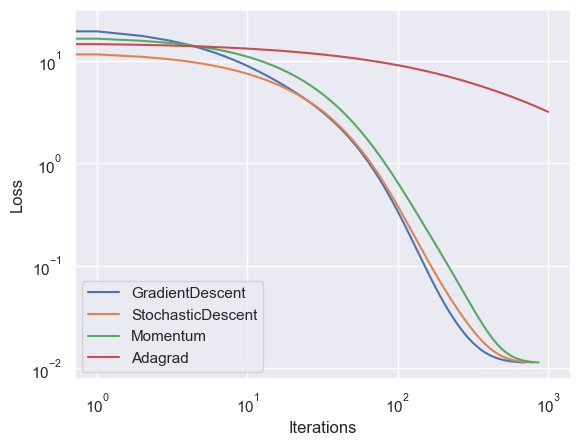

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range((len(gradient_descent.loss_history))), gradient_descent.loss_history, label=LinReg.GRADIENT_DESCENT)
ax.plot(range(len(stochastic_descent.loss_history)), stochastic_descent.loss_history, label=LinReg.STOCHASTIC_DESCENT)
ax.plot(range(len(momentum.loss_history)), momentum.loss_history, label=LinReg.MOMENTUM)
ax.plot(range(len(adagrad.loss_history)), adagrad.loss_history, label=LinReg.ADAGRAD)

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.yscale("log")
plt.xscale("log")

plt.legend()
plt.show()

Все, кроме `Adagrad` сходятся почти одинаково. `Adagrad` сходится заметно хуже всех остальных, `GradientDescent` как будто совсем чуть-чуть лучше оставшихся двух 